In [16]:
from sqlalchemy.engine import URL
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
from sqlalchemy.sql import text
import pandas as pd
from unidecode import unidecode
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from matplotlib import pyplot as plt
#cargar .env file
load_dotenv()
#connect to database
url_object = URL.create(
    "postgresql",
    username=os.getenv('USER'),
    password=os.getenv('PASS'),  # plain (unescaped) text
    host=os.getenv('HOST'),
    database=os.getenv('SCHEMA'),
)

#crear engine
engine = create_engine(url_object)


#configuracion nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\magda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Configuración de plot, query, etc.

In [17]:
#query
SAVE_TO_CSV_AS = None #change to 'path/filename.csv' to save as csv
POSTGRESQL = """
                SELECT description
                FROM "AgileBuyings" as t
                WHERE t."createdAt" >= CURRENT_DATE - INTERVAL '1 months'
             """
#plot
COLORMAP = 'GnBu'
BACKGROUND_COLOR = 'white'
MAX_WORDS = 80
SCALE = 3 #arregla pixelado en el plot, en vez de hacer mas grande figsize
FIGSIZE = (21,13)
#nltk
stop_words_es = set(stopwords.words('spanish'))


## Ejecución

In [18]:
def query(postgresql_query):
    assert type(POSTGRESQL) == str
    #conectarse
    conn = engine.connect() 
    my_query = text(postgresql_query)
    resultSet = conn.execute(my_query).fetchall()
    #cerrar conexion
    conn.close()
    return resultSet

In [ ]:
#query to dataframe
df_query = pd.DataFrame(query(POSTGRESQL))

connect


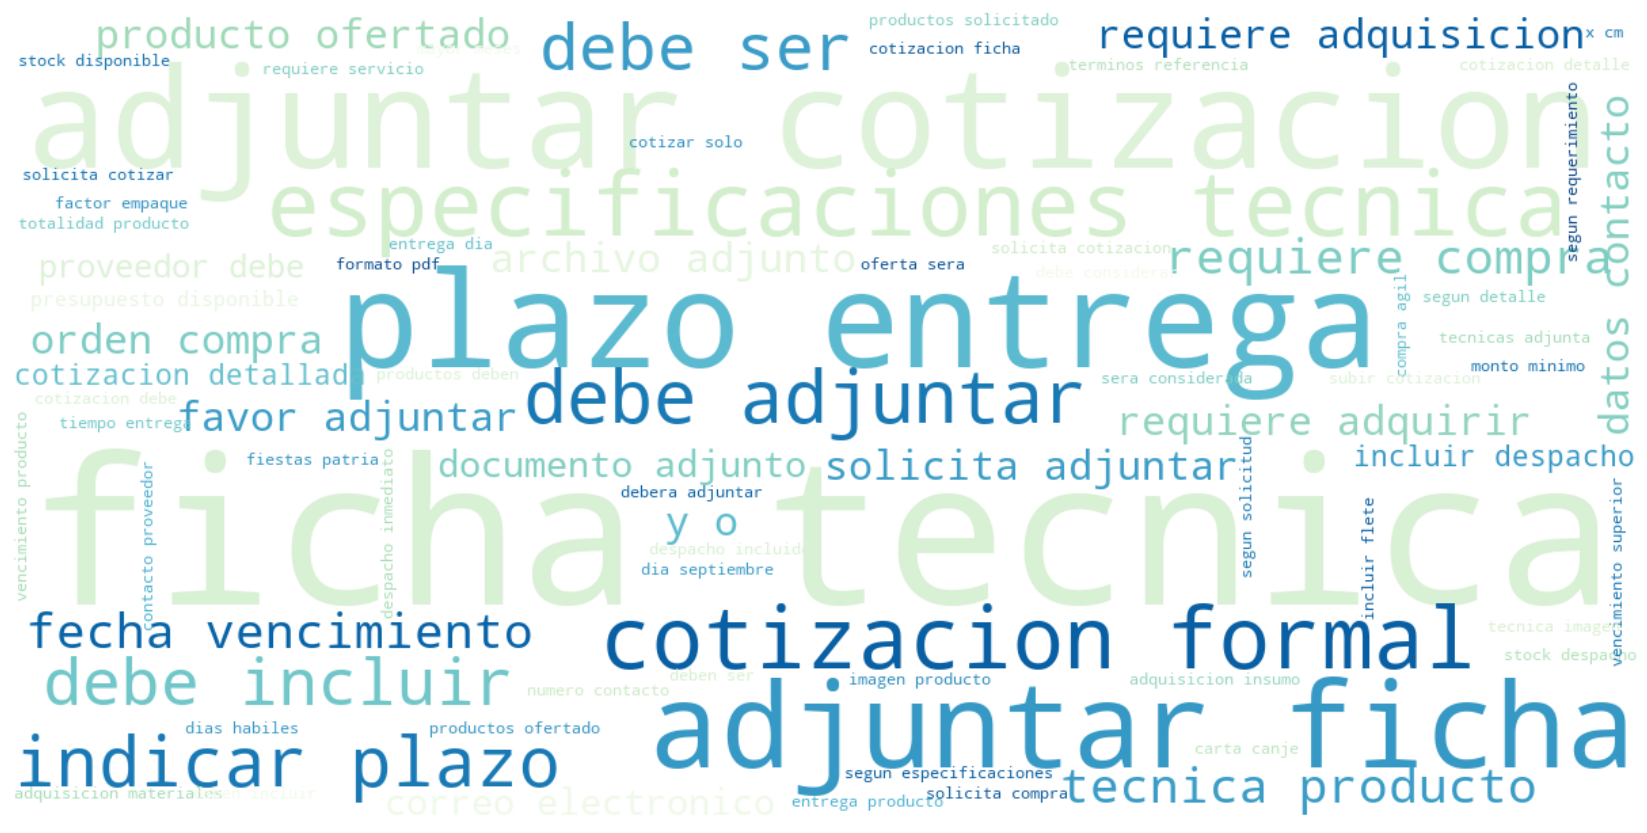

In [19]:
#normalizar y preparar texto
sin_acentos = df_query['description'].apply(unidecode)
descriptions = ' '.join(sin_acentos).lower()
sin_stopwords = ' '.join([palabra for palabra in descriptions.split() if palabra.lower() not in stop_words_es])
text = sin_stopwords
# Create and generate a word cloud image:
wordcloud = WordCloud(scale = SCALE,
                    colormap = COLORMAP,
                    max_font_size=50, 
                    max_words= MAX_WORDS, 
                    background_color=BACKGROUND_COLOR).generate(text)
fig, ax = plt.subplots(figsize = FIGSIZE)
ax.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()
